# Download the daset on NewE3 "Stocks_ClosePrice.csv" and start with the five stocks. Answer the following questions.






In [39]:
!pip install seaborn --upgrade
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [40]:
stock_data = pd.read_csv("/content/drive/MyDrive/Machine Learning and FinTech/HW1_0916/HW0916_03/Stocks_ClosePrice.csv")
print(stock_data.head())

        Date          FB         GOOG        NFLX         AMZN        AAPL  \
0  2018/9/24  165.410004  1173.369995  369.609985  1934.359985  220.789993   
1  2018/9/25  164.910004  1184.650024  369.429993  1974.550049  222.190002   
2  2018/9/26  166.949997  1180.489990  377.880005  1974.849976  220.419998   
3  2018/9/27  168.839996  1194.640015  380.709991  2012.979980  224.949997   
4  2018/9/28  164.460007  1193.469971  374.130005  2003.000000  225.740005   

       FB.1    GOOG.1    NFLX.1    AMZN.1    AAPL.1  
0       NaN       NaN       NaN       NaN       NaN  
1 -0.003027  0.009567 -0.000487  0.020564  0.006321  
2  0.012294 -0.003518  0.022615  0.000152 -0.007998  
3  0.011257  0.011915  0.007461  0.019124  0.020343  
4 -0.026284 -0.000980 -0.017435 -0.004970  0.003506  


## (a) Find the mean and standard deviation of returns of these five stocks.

In [41]:
# Selecting the columns for the returns (FB.1, GOOG.1, NFLX.1, AMZN.1, AAPL.1)
returns_columns = ['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']

# Calculate the mean and standard deviation for the returns of each stock
mean_returns = stock_data[returns_columns].mean()
std_returns = stock_data[returns_columns].std()

print(f"The mean and standard deviation of returns for each stock are:", end="\n\n")
print(f"Mean: \n{mean_returns}", end="\n\n")
print(f"Standard Deviation: \n{std_returns}", end="\n\n")

The mean and standard deviation of returns for each stock are:

Mean: 
FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64

Standard Deviation: 
FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64



## (b) Plot the mean and risk (standard deviation) for these five returns using red stars in the 2-dimensional plane.

<ipython-input-42-1cb0b550afdc>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(std_returns[i], mean_returns[i], stock.split('.')[0], fontsize=12)


Text(0, 0.5, 'Mean Return')

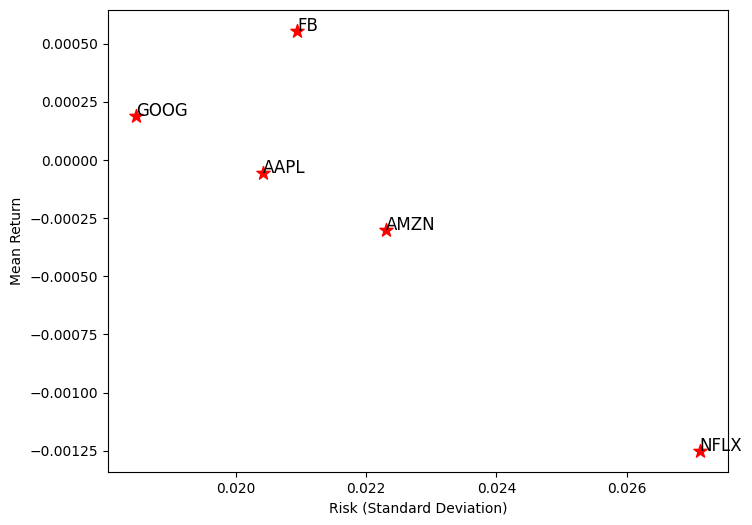

In [42]:
plt.figure(figsize=(8, 6))

# Scatter plot using red stars
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=100)

# Adding labels for the stocks
for i, stock in enumerate(returns_columns):
    plt.text(std_returns[i], mean_returns[i], stock.split('.')[0], fontsize=12)

# Labeling the axes
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')


## (c) Randomly selected weights so that each weight is nonnegative and sums up to one. Print the random weight, the mean and standard deviation of the portfolio.

Dirichlet Distribution: [Wiki](https://zh.wikipedia.org/zh-tw/%E7%8B%84%E5%88%A9%E5%85%8B%E9%9B%B7%E5%88%86%E5%B8%83), [Rosetta.ai](https://rosetta.ai/zh-tw/blog/a-deep-dive-into-latent-dirichlet-allocation-lda-and-its-applications-on-recommender-systems)

Portfolio Standard Deviation Formula: [Link](https://blog.therongroup.org/portfolio-standard-deviation/)


In [43]:
def biased_weights(num_stocks, bias_factors):
    """
    Generate biased random weights that sum to 1, with bias factors encouraging higher weights for riskier stocks.
    :param num_stocks: Number of stocks.
    :param bias_factors: Array of bias factors to control weight distribution.
    :return: Array of random weights summing to 1.
    """
    # Create a biased Dirichlet distribution by scaling the factors
    weights = np.random.dirichlet(bias_factors, size=1)[0]
    return weights

In [44]:
num_stocks = len(returns_columns)

# Assume bias factors are proportional to standard deviations (higher risk gets higher weight)
bias_factors = stock_data[returns_columns].std()

# Generate biased weights
weights = biased_weights(num_stocks, bias_factors)

# Print the random weights
print("Randomly generated weights:")
for i, stock in enumerate(returns_columns):
    print(f"{stock.split('.')[0]}: {weights[i]:.4f}")

# Calculate portfolio mean (expected return)
portfolio_mean = np.dot(weights, mean_returns)

# Calculate portfolio standard deviation (risk)
cov_matrix = np.cov(stock_data[returns_columns].dropna(), rowvar=False)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the portfolio mean and standard deviation
print(f"\nPortfolio Mean Return: {portfolio_mean:.4f}")
print(f"Portfolio Standard Deviation (Risk): {portfolio_std:.4f}")

Randomly generated weights:
FB: 0.2184
GOOG: 0.0000
NFLX: 0.0261
AMZN: 0.7555
AAPL: 0.0000

Portfolio Mean Return: -0.0001
Portfolio Standard Deviation (Risk): 0.0208


## (d) Repeat c) for 1000 times, and plot the mean and standard deviation for these artificial portfolios using blue points in the 2-dimensional plane in b).  

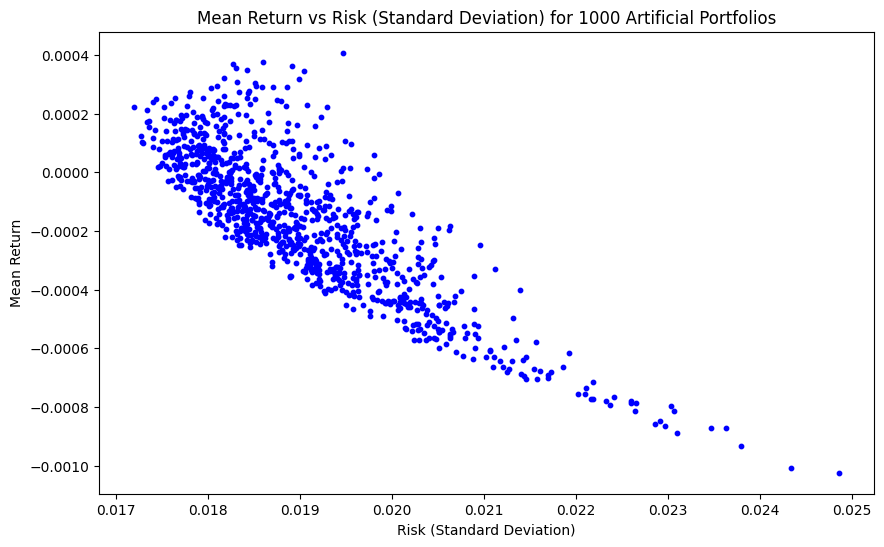

In [45]:
num_portfolios = 1000

# Arrays to store the portfolio means and standard deviations
portfolio_means = []
portfolio_stds = []
portfolio_weights = []

# Loop to generate 1000 portfolios
for _ in range(num_portfolios):
    # Generate random weights that are nonnegative and sum to 1
    weights = np.random.dirichlet(np.ones(num_stocks), size=1)[0]

    # Calculate portfolio mean (expected return)
    portfolio_mean = np.dot(weights, mean_returns)

    # Calculate portfolio standard deviation (risk)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Store the results
    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)
    portfolio_weights.append(weights)

# Plotting the results in a 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_stds, portfolio_means, color='blue', marker='o', s=10)

# Labeling the axes
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Mean Return')

# Title of the plot
plt.title('Mean Return vs Risk (Standard Deviation) for 1000 Artificial Portfolios')
plt.show()

## (e) Draw the efficiency frontier in the figure of b), assuming that no short sales are allowed.

An **efficient frontier** is a set of investment portfolios that are expected to provide the highest returns at a given level of risk.


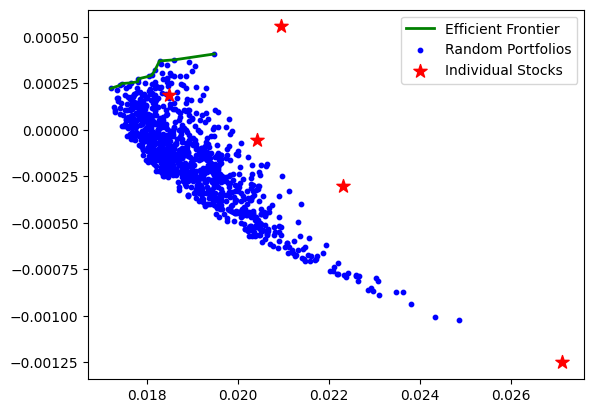

In [46]:
# Convert the results to numpy arrays for easier manipulation
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)

# (e) Efficient Frontier: select portfolios with the highest return for each level of risk
# Sort the portfolios by risk (standard deviation)
sorted_indices = np.argsort(portfolio_stds)
sorted_stds = portfolio_stds[sorted_indices]
sorted_means = portfolio_means[sorted_indices]

# Filter portfolios to form the efficient frontier
efficient_means = []
efficient_stds = []
current_max_mean = -np.inf

for i in range(len(sorted_means)):
    if sorted_means[i] > current_max_mean:
        current_max_mean = sorted_means[i]
        efficient_means.append(sorted_means[i])
        efficient_stds.append(sorted_stds[i])

plt.plot(efficient_stds, efficient_means, color='green', lw=2, label='Efficient Frontier')
plt.scatter(portfolio_stds, portfolio_means, color='blue', marker='o', s=10, label='Random Portfolios')
plt.scatter(std_returns, mean_returns, color='red', marker='*', s=100, label='Individual Stocks')
plt.legend()
plt.show()

## (f) Check if the efficiency frontier in e) is the envelope line of the blue points in d).

Yes. The envelope line (efficient frontier) represents the best possible set of portfolios in terms of risk and return.